In [90]:
import pandas as pd
import seaborn as sns
import sklearn.utils.random as sk_random

from typing import List

In [91]:
FILE_PATH = "data/train_data.csv"
GROUP_NUMBER = 11
NUMBER_OF_ROWS = 5531451
CHUNK_SIZE = 100000

## Introducción al dataset

In [92]:
def get_seed_for_group(group_number: int) -> int:
    return (31416 * group_number) % 1000

def read_csv_and_create_subset(file: str, filtering_indexes: List[int], chunk_size: int):
    final_df = None
    for chunk in pd.read_csv(filepath_or_buffer=file, chunksize=chunk_size):
        chunk = chunk[chunk.index.isin(filtering_indexes)]

        if final_df is None:
            final_df = chunk
        else:
            final_df = pd.concat([final_df, chunk])

    return final_df


In [93]:
random_index = sk_random.sample_without_replacement(
        NUMBER_OF_ROWS,
        NUMBER_OF_ROWS * 0.05,
        random_state=get_seed_for_group(GROUP_NUMBER)
)
dataset = read_csv_and_create_subset(file=FILE_PATH, filtering_indexes=random_index, chunk_size=CHUNK_SIZE)

In [94]:
dataset.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 190, dtype: object

<AxesSubplot:>

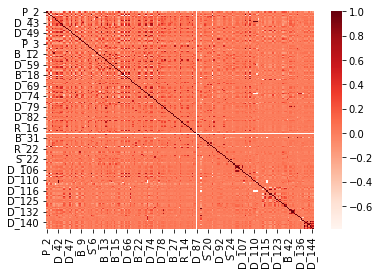

In [95]:
sns.heatmap(dataset.corr(method='pearson'), cmap='Reds')